# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [29]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [30]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return numpy.sin(x)*(x**2)

Ensure your function works with numpy arrays:

In [31]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [32]:
def g(x):
    '''Analytical integral of f(x).'''
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [33]:
assert g(0) == 0.

In [34]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [35]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return 2*xmax*numpy.sin(xmax)-(xmax**2-2)*numpy.cos(xmax)-(2*xmin*numpy.sin(xmin)-(xmin**2-2)*numpy.cos(xmin))

Check your analytic function:

In [36]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [37]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    S=numpy.sin(xmin)*(xmin**2)+numpy.sin(xmax)*(xmax**2)
    w=(xmax-xmin)/(N)
    c=1
    t=0.5
    while xmin+c*w<xmax:
        S+=2*numpy.sin(xmin+c*w)*((xmin+c*w)**2)
        c+=1
    while xmin+t*w<xmax:
        S+=4*numpy.sin(xmin+t*w)*((xmin+t*w)**2)
        t+=1
    return (w*S/6)

Make sure you have implemented Simpson's rule correctly:

In [38]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [39]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


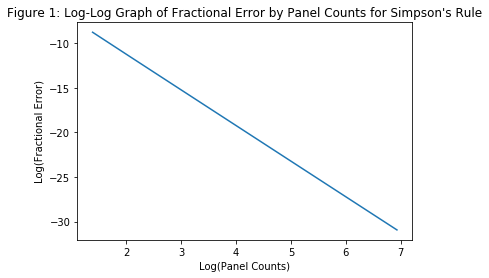

In [40]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
def G(a,b):
    yvalues=[]
    for i in panel_counts:
        yvalues.append((result_analytic-integrate_numeric(a,b,i))/result_analytic)
    fig=plt.plot(numpy.log(panel_counts),numpy.log(yvalues))
    plt.xlabel("Log(Panel Counts)")
    plt.ylabel("Log(Fractional Error)")
    plt.title("Figure 1: Log-Log Graph of Fractional Error by Panel Counts for Simpson's Rule")
    return(fig)
G(x0,x1)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The larger the number of panels, the more accurate the numerical method becomes ie. the fractional error decreases (dramatically). If the number of panels becomes too large then the fractional error will begin to fluctuate due to numerical round off errors. If N becomes exceptionally large the computer would take a very long time to calculate the integral.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

An increase in panels would again lead to an increase in accuracy, but at a slightly lower rate than Simpson's rule.